In [108]:
import pandas as pd
import pycountry
import pycountry_convert as pc
import matplotlib.pyplot as plt

In [204]:
df = pd.read_csv('current health expenditure.csv')
df.head()

,Country Name,Country Code,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],...,2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018]
0,Afghanistan,AFG,NaN,NaN,9.443390,8.941258,9.808474,9.948290,10.622766,9.904675,...,9.818487,8.569672,8.561907,7.897176,8.805941,9.528871,10.105348,11.818562,12.620817,14.126743
1,Africa Eastern and Southern,AFE,6.252428,6.390627,5.969416,6.635666,6.710734,6.528098,6.493183,6.469144,...,6.881587,6.923020,6.774233,6.563003,6.565593,6.151985,6.482030,6.390371,6.317424,6.323236
2,Africa Western and Central,AFW,3.771302,3.775136,3.389315,4.680784,4.481509,4.276980,4.140280,3.908468,...,3.786789,3.519651,3.547476,3.503394,3.619163,3.606540,3.832625,3.811249,3.789624,3.383501
3,Albania,ALB,7.233370,7.139524,6.909341,7.063490,6.773372,6.335542,6.009277,6.316834,...,4.602225,4.745796,4.795341,5.055265,5.385611,5.503473,4.896312,4.916017,5.012636,5.232072
4,Algeria,DZA,3.489033,3.837877,3.730042,3.601041,3.544073,3.235161,3.355102,3.821416,...,5.359395,5.117172,5.267481,6.000510,6.035763,6.547214,6.978489,6.607496,6.279384,6.163026


In [205]:
# df.groupby('Country Name').count()

In [206]:
df = pd.melt(
        df,
        id_vars = ['Country Name','Country Code'],
        var_name = 'year',
        value_name='current health expenditure'
        )
# print(df)

In [207]:
df

,Country Name,Country Code,year,current health expenditure
0,Afghanistan,AFG,2000 [YR2000],NaN
1,Africa Eastern and Southern,AFE,2000 [YR2000],6.252428
2,Africa Western and Central,AFW,2000 [YR2000],3.771302
3,Albania,ALB,2000 [YR2000],7.233370
4,Algeria,DZA,2000 [YR2000],3.489033
...,...,...,...,...
4441,Vietnam,VNM,2018 [YR2018],5.034489
4442,World,WLD,2018 [YR2018],9.701241
4443,"Yemen, Rep.",YEM,2018 [YR2018],NaN
4444,Zambia,ZMB,2018 [YR2018],5.032715


In [208]:
df['year'] = df.year.apply(lambda row: row[:4])
df['current health expenditure'] = df['current health expenditure'].astype(float)
df = df.sort_values(['Country Name', 'year'], ascending = True)
df = df.dropna(subset = ['current health expenditure'], axis = 0, how = 'any')
df.reset_index(drop = True, inplace = True)

In [224]:
df['year'] = df['year'].astype(int)
# df['Continent'] = df['Country Name'].apply(lambda row: country_to_continent(row))
df

,Country Name,Country Code,year,current health expenditure
0,Afghanistan,AFG,2002,9.443390
1,Afghanistan,AFG,2003,8.941258
2,Afghanistan,AFG,2004,9.808474
3,Afghanistan,AFG,2005,9.948290
4,Afghanistan,AFG,2006,10.622766
...,...,...,...,...
4377,Zimbabwe,ZWE,2014,8.133525
4378,Zimbabwe,ZWE,2015,7.452066
4379,Zimbabwe,ZWE,2016,7.675163
4380,Zimbabwe,ZWE,2017,7.469752


In [210]:
df

,Country Name,Country Code,year,current health expenditure
0,Afghanistan,AFG,2002,9.443390
1,Afghanistan,AFG,2003,8.941258
2,Afghanistan,AFG,2004,9.808474
3,Afghanistan,AFG,2005,9.948290
4,Afghanistan,AFG,2006,10.622766
...,...,...,...,...
4377,Zimbabwe,ZWE,2014,8.133525
4378,Zimbabwe,ZWE,2015,7.452066
4379,Zimbabwe,ZWE,2016,7.675163
4380,Zimbabwe,ZWE,2017,7.469752


In [211]:
import plotly.express as px
countries = ['Japan','Iceland','Sweden','Luxembourg','Norway']
px.line(df[df['Country Name'].isin(countries)], x='year', y='current health expenditure', color='Country Name')

In [212]:
import pycountry

def is_valid_country(country_name):
    try:
        pycountry.countries.search_fuzzy(country_name)
        return country_name
    except LookupError:
        return 
def country_to_continent(country_name):
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    try:
        country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    except: 
        country_continent_name = None
    # country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name

In [215]:
df_2018 = df[df.year==2018]
df_2018 = df_2018.sort_values(['current health expenditure'], ascending=False)
df_2018['country'] = df_2018['Country Name'].apply(lambda x: is_valid_country(x))
df_2018[df_2018.country == "Cote d'Ivoire"] = None
df_2018 = df_2018.dropna(subset = ['country'], axis = 0, how = 'any')
df_2018 = df_2018.drop('Country Name', axis=1)
df_2018.reset_index(inplace=True, drop=True)
df_2018

,Country Code,year,current health expenditure,country
0,TUV,2018.0,19.036005,Tuvalu
1,MHL,2018.0,17.002190,Marshall Islands
2,USA,2018.0,16.687105,United States
3,AFG,2018.0,14.126743,Afghanistan
4,KIR,2018.0,11.698363,Kiribati
...,...,...,...,...
166,BEN,2018.0,2.504164,Benin
167,BRN,2018.0,2.412894,Brunei Darussalam
168,PNG,2018.0,2.266304,Papua New Guinea
169,DJI,2018.0,2.262542,Djibouti


In [216]:
df_2018['Continent'] = df_2018['country'].apply(lambda row: country_to_continent(row))
df_2018

,Country Code,year,current health expenditure,country,Continent
0,TUV,2018.0,19.036005,Tuvalu,Oceania
1,MHL,2018.0,17.002190,Marshall Islands,Oceania
2,USA,2018.0,16.687105,United States,North America
3,AFG,2018.0,14.126743,Afghanistan,Asia
4,KIR,2018.0,11.698363,Kiribati,Oceania
...,...,...,...,...,...
166,BEN,2018.0,2.504164,Benin,Africa
167,BRN,2018.0,2.412894,Brunei Darussalam,Asia
168,PNG,2018.0,2.266304,Papua New Guinea,Oceania
169,DJI,2018.0,2.262542,Djibouti,Africa


In [183]:
# df_2018[df_2018.country == "Cote d'Ivoire"] = None

In [184]:
# df_2018[df_2018.country == "Cote d'Ivoire"]

,Country Code,year,current health expenditure,country


In [185]:
# df_2018 = df_2018.dropna(subset = ['country'], axis = 0, how = 'any')
# df_2018

,Country Code,year,current health expenditure,country


In [218]:
df_2018_continent = df_2018.groupby('Continent').mean()
df_2018_continent.sort_values(by='current health expenditure',ascending=False, inplace=True)
df_2018_continent.reset_index(inplace=True)
df_2018_continent

,Continent,year,current health expenditure
0,Oceania,2018.0,8.395308
1,Europe,2018.0,7.900726
2,South America,2018.0,7.650453
3,North America,2018.0,7.311939
4,Africa,2018.0,5.579032
5,Asia,2018.0,5.318437


<BarContainer object of 6 artists>

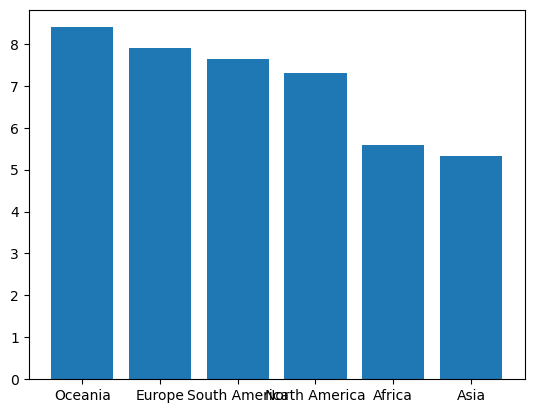

In [219]:
plt.bar(df_2018_continent.Continent,df_2018_continent['current health expenditure'])

In [225]:
import plotly.io as pi
fig = px.bar(df_2018.sort_values('current health expenditure',ascending=False).head(10),x='country', y='current health expenditure',
        color='Continent',template='simple_white', width=1000, height=700, text='current health expenditure',
        labels={'current health expenditure':'current health expenditure'})
fig

In [124]:
final_df = pd.read_csv('final_df_2.csv')
final_df

,Country,Code,Year,avg_years_of_schooling,Both sexes,Male,Female,Continent,suicides_per_100k,gdp
0,Uzbekistan,UZB,2000,9.1,183,230,135,Asia,120.31,632
1,Brazil,BRA,2000,5.6,184,244,122,South America,68.23,4156
2,Maldives,MDV,2000,3.0,142,155,129,Asia,0.00,2524
3,Malta,MLT,2000,8.1,70,88,51,Europe,78.05,11873
4,Mauritius,MUS,2000,6.2,172,221,121,Africa,140.82,4339
...,...,...,...,...,...,...,...,...,...,...
1199,Sweden,SWE,2016,12.4,52,64,40,Europe,138.84,55594
1200,Austria,AUT,2016,12.1,62,80,44,Europe,183.23,46976
1201,Iceland,ISL,2016,12.4,55,67,42,Europe,138.07,64708
1202,Cyprus,CYP,2016,12.1,55,73,37,Asia,47.15,25098


In [140]:
type(df.year[0])

numpy.int32

In [151]:
df_comb = pd.merge(df, final_df, left_on=['Country Name','year'], right_on = ['Country','Year'], how='inner')
df_comb = df_comb.drop(['Country Name','year','Country Code'], axis=1)
df_comb

,GDP,Country,Code,Year,avg_years_of_schooling,Both sexes,Male,Female,Continent,suicides_per_100k,gdp
0,7.233370,Albania,ALB,2000,8.8,106,133,76,Europe,30.70,1299
1,7.139524,Albania,ALB,2001,8.7,100,125,73,Europe,50.62,1451
2,6.909341,Albania,ALB,2002,9.0,102,126,77,Europe,62.51,1573
3,7.063490,Albania,ALB,2003,9.0,107,129,82,Europe,58.60,2021
4,6.773372,Albania,ALB,2004,9.1,101,127,74,Europe,65.39,2544
...,...,...,...,...,...,...,...,...,...,...,...
1127,5.221669,Uzbekistan,UZB,2010,10.7,145,182,108,Asia,63.23,1533
1128,5.143769,Uzbekistan,UZB,2011,10.9,144,182,107,Asia,67.14,1767
1129,5.457236,Uzbekistan,UZB,2012,11.1,145,184,107,Asia,77.53,1964
1130,5.661737,Uzbekistan,UZB,2013,11.3,141,179,104,Asia,78.86,2150


In [152]:
df_comb = df_comb.sort_values(['Country', 'Year'], ascending = True)

In [153]:
import plotly.express as px
px.scatter(df_comb, x='GDP', y='suicides_per_100k',
           size='Both sexes', size_max=30, color='Continent', animation_frame="Year", animation_group="Country",
           template='simple_white', width=1000, height=700,hover_name='Country')